In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('cves_dataset.csv')

In [3]:
#making the severity distribution 
sev_df = df['cvss'].value_counts(bins=10)

In [4]:
#changing the series into a dataframe
dist_df = sev_df.to_frame()

In [5]:
#changing (-0.011,1.0] distibution to[0.0,1.0] after checking there are no cvvs less than 0 
df[df['cvss'] < 0]
dist_df = dist_df.rename({pd.Interval(-0.011,1.0,closed = 'right') : pd.Interval(0.0,1.0,closed = 'both')})

In [6]:
#giving a name to the distribution column
dist_df.reset_index(inplace=True)
dist_df.rename(columns={'index':'distibution_range', 'cvss':'count_cvss'}, inplace=True)

In [7]:
#sorting the dataframe by the distribution column
dist_df.set_index('distibution_range', inplace=True)
dist_df.sort_values('distibution_range',inplace=True)

In [8]:
dist_df.to_csv('AtBay - Q2a.csv')

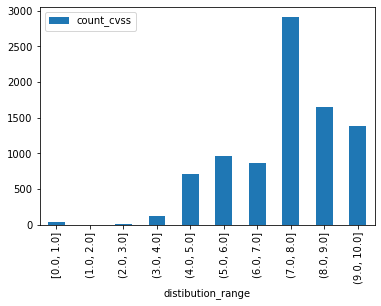

In [9]:
#making the graph bar to desplay the distribution
dist_graph = dist_df.plot(kind='bar')

In [10]:
#downloading the graph
fig = dist_graph.get_figure()
fig.savefig('distribution_graph.pdf', bbox_inches='tight')

In [11]:
#returning the cvss that is rated as 'critical'
df_critical = df[df['cvss'] >= 9.0]

In [12]:
df_critical.to_csv('AtBay - Q2b.csv')